In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor'] = '#FFE584'

In [4]:
df = pd.read_csv(r'C:\Users\Rahul\Desktop\Data Science\Data Analyst\Python\world_happiness_2016.csv')

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
df_columns = ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [7]:
df= df[df_columns].copy()

In [8]:
happy_df = df.rename({'Country': 'country', 
                      'Region':'region', 
                      'Happiness Score': 'happiness_score', 
                      'Economy (GDP per Capita)': 'economy', 
                      'Family': 'family', 
                      'Health (Life Expectancy)': 'health', 
                      'Freedom': 'freedom', 
                      'Generosity': 'generosity', 
                      'Trust (Government Corruption)': 'trust'}, 
                     axis=1)

In [18]:
happy_df.head()

,country,region,happiness_score,economy,family,health,freedom,generosity,trust
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004


In [10]:
happy_df.isnull().sum()

country            0
region             0
happiness_score    0
economy            0
family             0
health             0
freedom            0
generosity         0
trust              0
dtype: int64

Text(0, 0.5, 'GDP per capita')

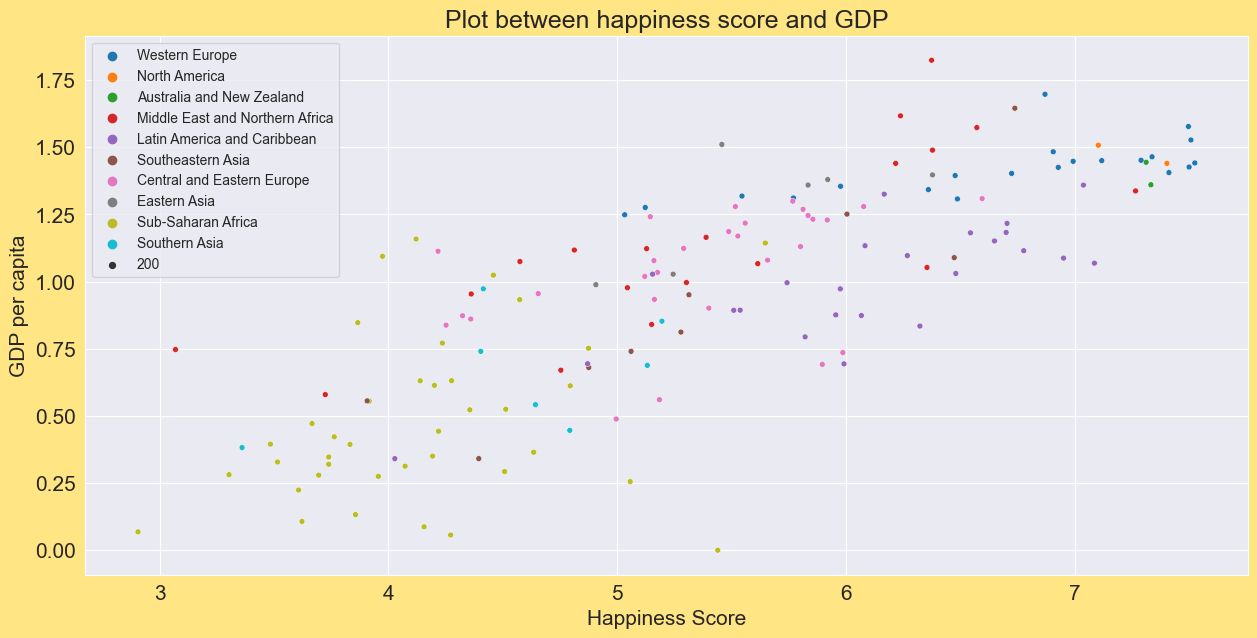

In [11]:
# Plot between happiness and GDP
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between happiness score and GDP')
sns.scatterplot(x = happy_df.happiness_score, 
                y = happy_df.economy, 
                hue = happy_df.region, 
                size=200);

plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [12]:
gdp_region = happy_df.groupby('region')['economy'].sum()
gdp_region

region
Australia and New Zealand           2.80509
Central and Eastern Europe         30.37857
Eastern Asia                        7.66387
Latin America and Caribbean        23.84184
Middle East and Northern Africa    21.64714
North America                       2.94811
Southeastern Asia                   8.06743
Southern Asia                       4.62470
Sub-Saharan Africa                 18.02421
Western Europe                     29.75817
Name: economy, dtype: float64

Text(0.5, 1.0, 'GDP by Region')

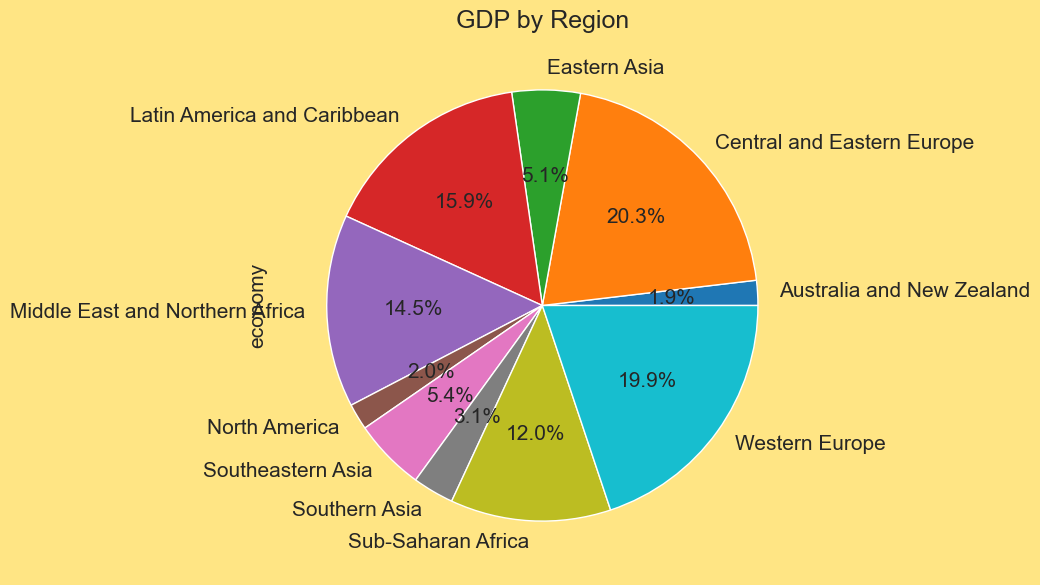

In [13]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')


In [14]:
# Total countries
total_country = happy_df.groupby('region')[['country']].count()
print(total_country)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           24
Middle East and Northern Africa       19
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    38
Western Europe                        21


In [20]:
# Curruption i regions
corruption = happy_df.groupby('region')[['trust']].mean()
corruption

,trust
region,
Australia and New Zealand,0.371175
Central and Eastern Europe,0.088072
Eastern Asia,0.118347
Latin America and Caribbean,0.106016
Middle East and Northern Africa,0.161526
North America,0.230985
Southeastern Asia,0.148104
Southern Asia,0.104899
Sub-Saharan Africa,0.120379


<BarContainer object of 10 artists>

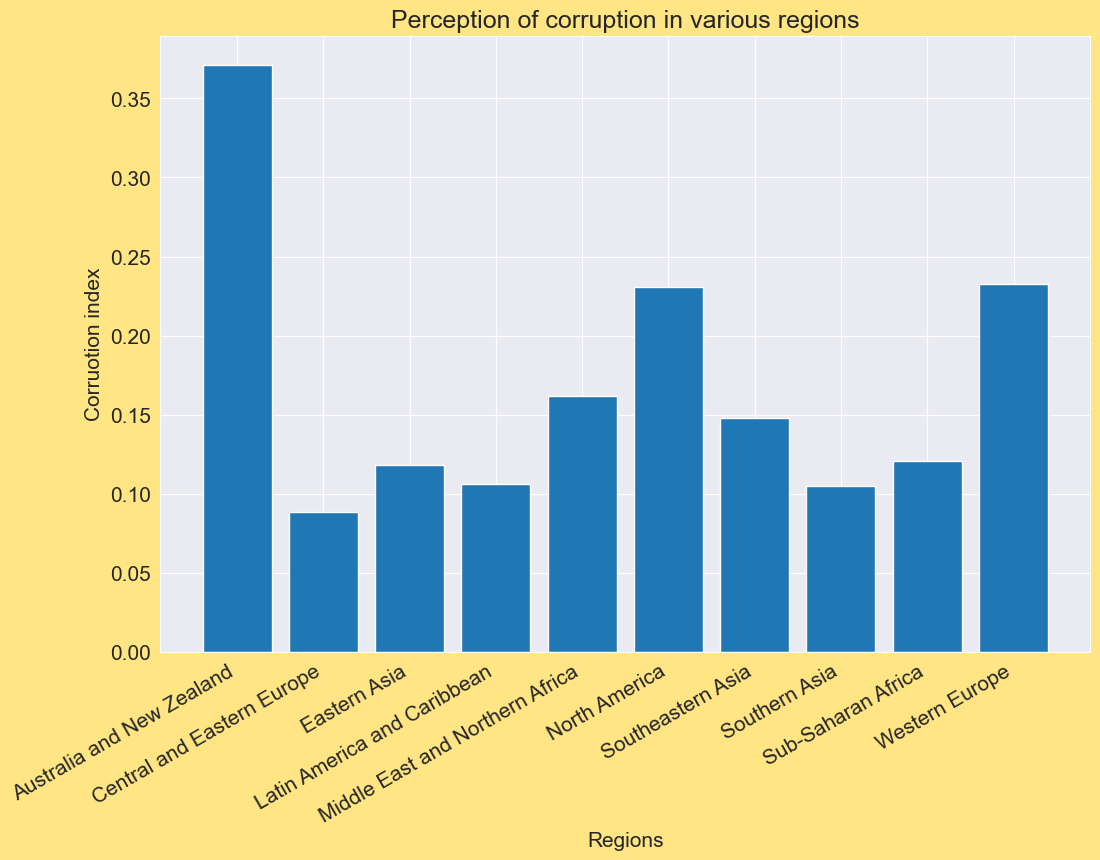

In [22]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception of corruption in various regions')
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Corruotion index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.trust)

In [23]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_25596\2583083170.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45, ha='right')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_25596\2583083170.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45, ha='right')


Text(831.8358585858584, 0.5, 'Life expectancy')

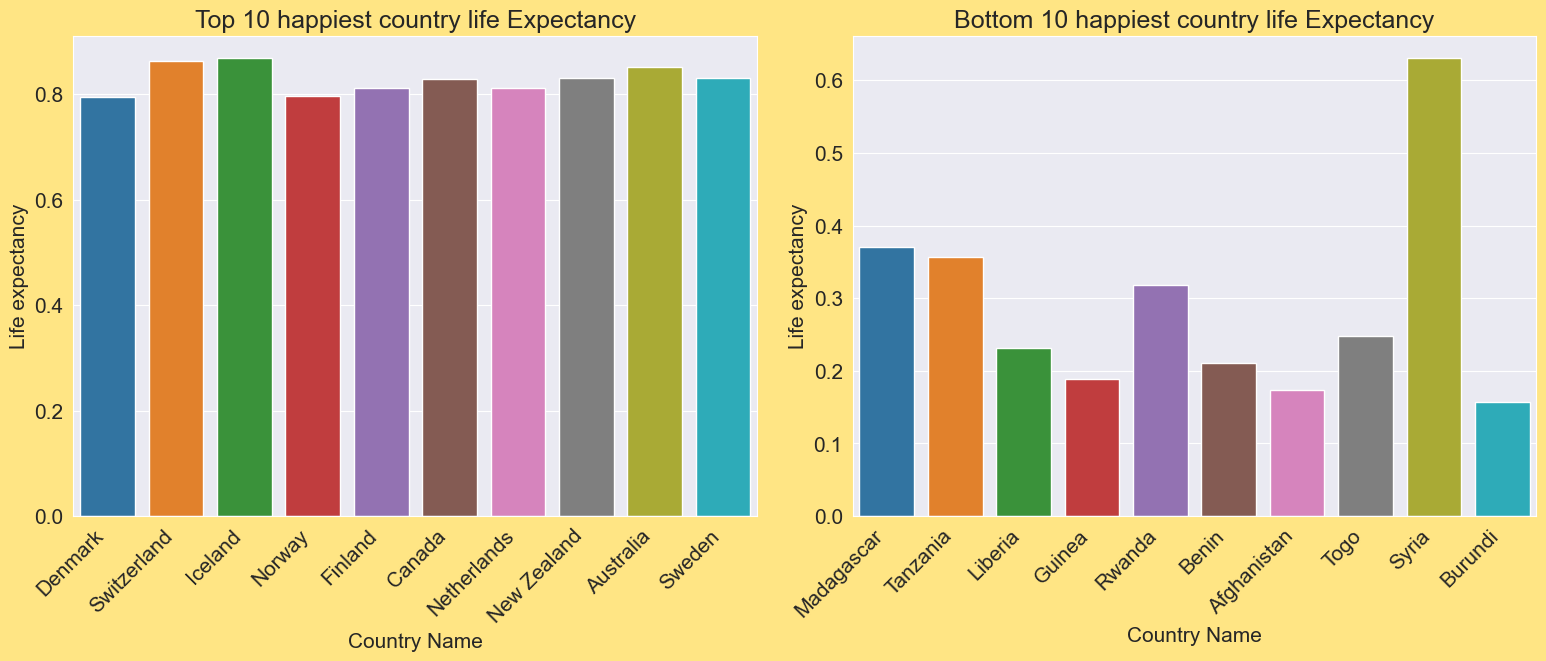

In [25]:
fig, axes= plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad=2)
xlabels= top_10.country
axes[0].set_title('Top 10 happiest country life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45, ha='right') 
sns.barplot(x= top_10.country,
           y = top_10.health,
           ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

xlabels= bottom_10.country
axes[1].set_title('Bottom 10 happiest country life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45, ha='right') 
sns.barplot(x= bottom_10.country,
           y = bottom_10.health,
           ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness Score')

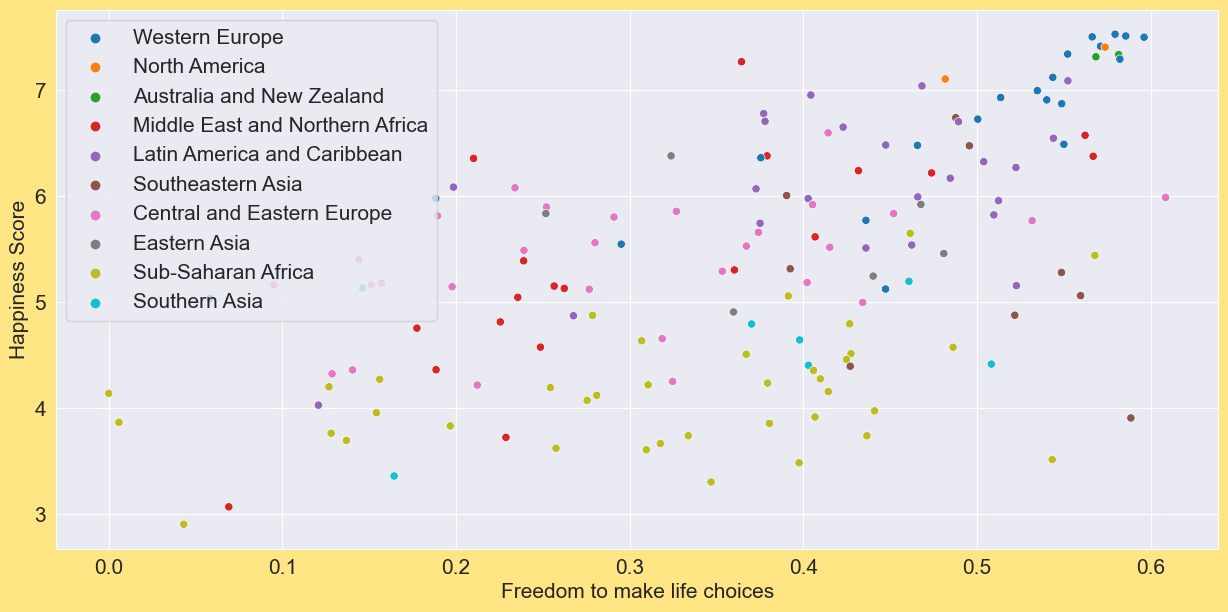

In [26]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom, 
               y=happy_df.happiness_score,
               hue=happy_df.region)
plt.legend(loc='upper left')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

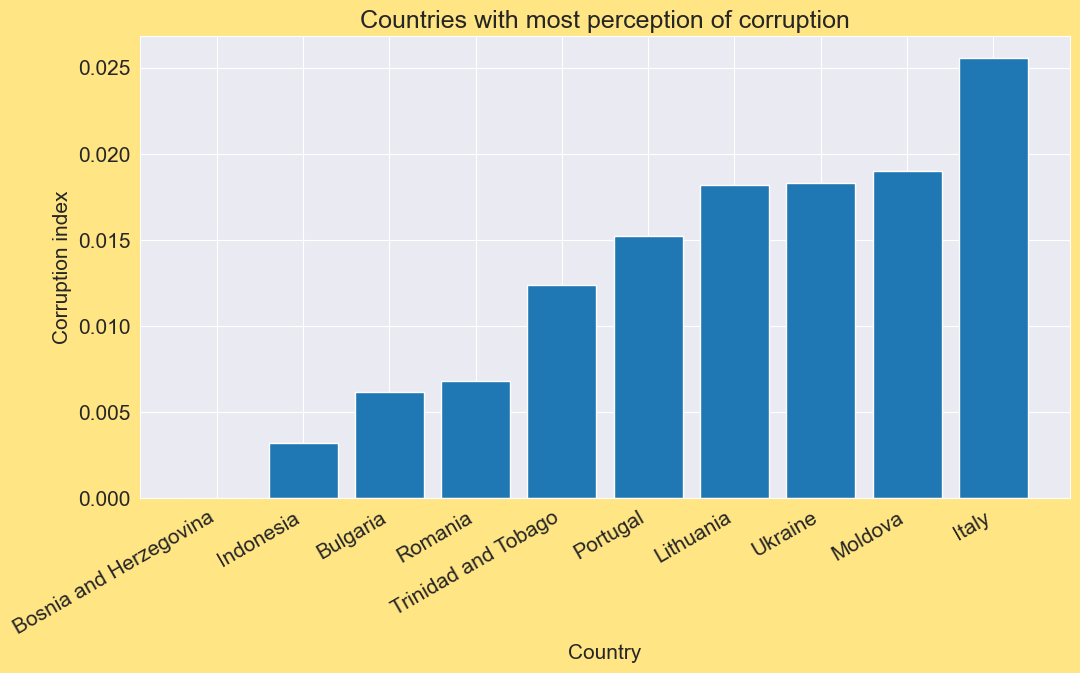

In [30]:
country = happy_df.sort_values(by='trust').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of corruption')
plt.xlabel('Country')
plt.ylabel('Corruption index')
plt.xticks(rotation=30, ha='right')
plt.bar(country.country, country.trust)

<BarContainer object of 10 artists>

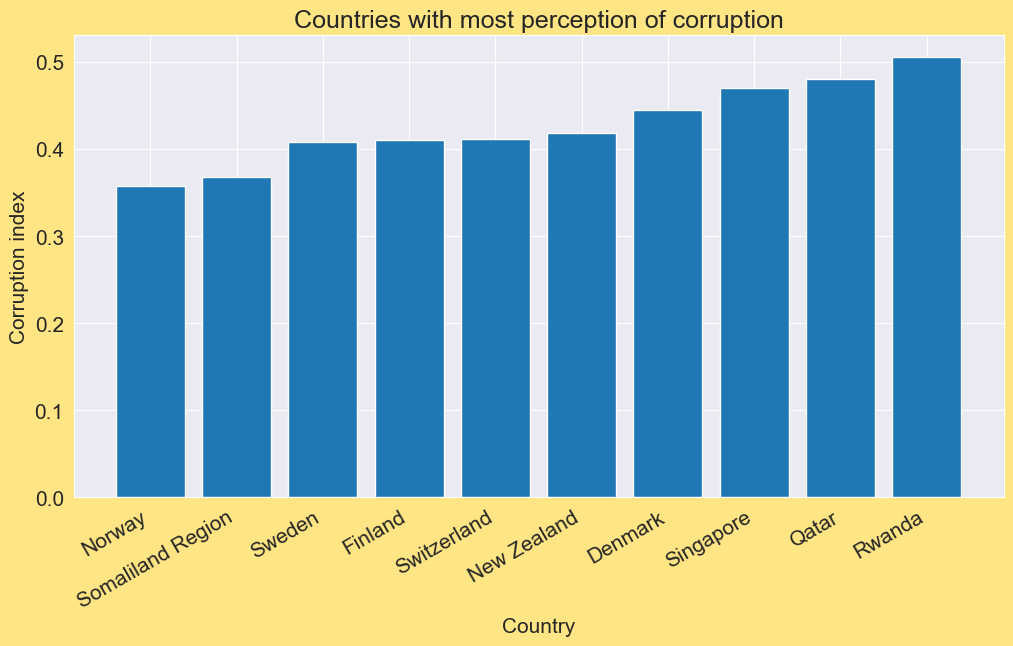

In [31]:
country = happy_df.sort_values(by='trust').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with most perception of corruption')
plt.xlabel('Country')
plt.ylabel('Corruption index')
plt.xticks(rotation=30, ha='right')
plt.bar(country.country, country.trust)

Text(0, 0.5, 'Corruption')

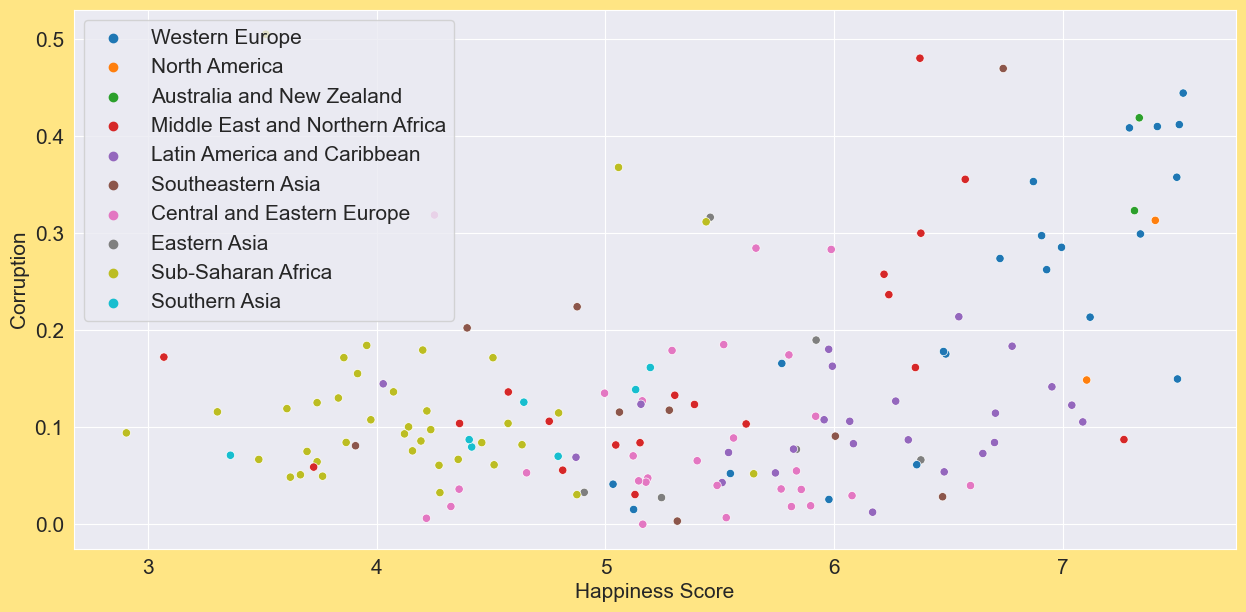

In [34]:
# corruption vs happiness
plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x=happy_df.happiness_score,
               y=happy_df.trust, 
               hue=happy_df.region)
plt.legend(loc='upper left')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')